✅ Geometry generated:
- Nodes: 12
- Panels: 16


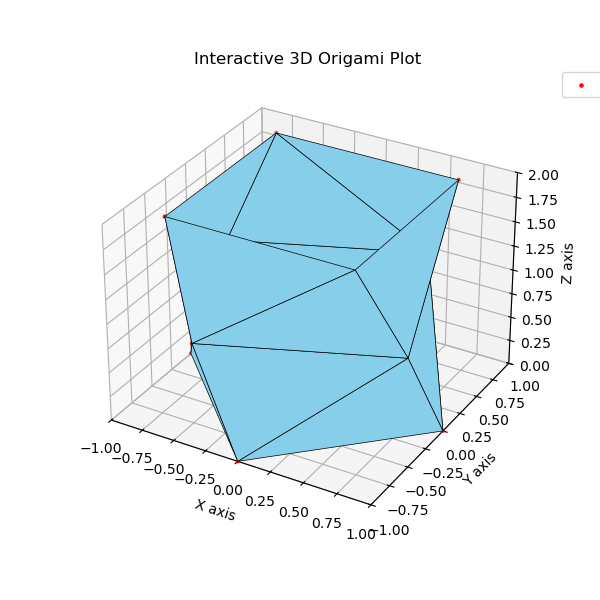

In [17]:
import numpy as np
%matplotlib widget


# === Define geometry and material parameters ===
N = 4             # Number of polygon sides
h = 1              # Height of each layer
lyr = 3           # Number of layers
phi = -np.pi / 8   # Twist angle per layer (can also be a list)

MaxIcr = 180       # Max number of increments
blam = 0.032       # Initial load factor

Kf = 1e-3          # Folding stiffness
Kb = Kf            # Bending stiffness
E0 = 5e3           # Stretching stiffness
Abar = 0.1         # Uniform cross-sectional area

limlft = 45        # Linear limit left (deg)
limrht = 315       # Linear limit right (deg)

# === Generate node coordinates and triangular panel connectivity ===
Node, Panel = get_di_sim(N, h, lyr, phi)

# === Print summary ===
print(f"✅ Geometry generated:\n- Nodes: {Node.shape[0]}\n- Panels: {len(Panel)}")

plot_ori(Node, Panel)

In [18]:
indsupp = np.where(Node[:, 2] < 0.01)[0]
nsupp = len(indsupp)

Supp = np.zeros((nsupp, 4), dtype=int)
Supp[0, :] = [indsupp[0], 1, 1, 1]
Supp[1, :] = [indsupp[1], 1, 1, 1]
Supp[2:, 0] = indsupp[2:]
Supp[2:, 1:] = np.array([1, 1, 1])  # equivalent to MATLAB's zeros + 1 and ones

# Define number of nodes
m = Node.shape[0]

# Find nodes at the top (max z)
indp = np.where(np.abs(Node[:, 2] - np.max(Node[:, 2])) < 1e-5)[0]
npp = len(indp)

# Define Load
Lo = 15
Load = np.column_stack((indp, np.zeros((npp, 2)), -Lo * np.ones(npp)))


In [19]:
truss, angles, F = PrepareData(Node, Panel, Supp, Load, BarMater , RotSpring , Kf, Abar) ; 

In [22]:
truss['U0'] = np.zeros((3 * truss['Node'].shape[0],))
U_his , LF_his , Data = PathAnalysis( truss , F,blam , MaxIcr ) ;

icrm = 1, lambda = 0.0000
    iter = 1, err = 4.471e-03, dlambda = 3.200e-02
    iter = 2, err = 1.750e-06, dlambda = -5.356e-05
    iter = 3, err = 2.352e-12, dlambda = -7.171e-12
icrm = 2, lambda = 0.0319
    iter = 1, err = 4.471e-03, dlambda = 3.189e-02
    iter = 2, err = 1.753e-06, dlambda = -5.347e-05
    iter = 3, err = 2.366e-12, dlambda = -7.207e-12
icrm = 3, lambda = 0.0638
    iter = 1, err = 4.471e-03, dlambda = 3.179e-02
    iter = 2, err = 1.756e-06, dlambda = -5.339e-05
    iter = 3, err = 2.381e-12, dlambda = -7.255e-12
icrm = 4, lambda = 0.0955
    iter = 1, err = 4.471e-03, dlambda = 3.168e-02
    iter = 2, err = 1.759e-06, dlambda = -5.331e-05
    iter = 3, err = 2.396e-12, dlambda = -7.293e-12
icrm = 5, lambda = 0.1271
    iter = 1, err = 4.471e-03, dlambda = 3.157e-02
    iter = 2, err = 1.762e-06, dlambda = -5.323e-05
    iter = 3, err = 2.410e-12, dlambda = -7.333e-12
icrm = 6, lambda = 0.1587
    iter = 1, err = 4.471e-03, dlambda = 3.147e-02
    iter = 2, err 

/var/folders/mv/k1gy43r50tq3vsmhxgpcdyrc0000gn/T/ipykernel_17630/1160350281.py:100: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Exbar[bel] = BarKe_SingleOut(u_local, B_local, L_local)


    iter = 3, err = 2.440e-12, dlambda = -7.416e-12
icrm = 8, lambda = 0.2214
    iter = 1, err = 4.471e-03, dlambda = 3.125e-02
    iter = 2, err = 1.771e-06, dlambda = -5.299e-05
    iter = 3, err = 2.455e-12, dlambda = -7.457e-12
icrm = 9, lambda = 0.2526
    iter = 1, err = 4.471e-03, dlambda = 3.115e-02
    iter = 2, err = 1.774e-06, dlambda = -5.291e-05
    iter = 3, err = 2.471e-12, dlambda = -7.499e-12
icrm = 10, lambda = 0.2837
    iter = 1, err = 4.471e-03, dlambda = 3.104e-02
    iter = 2, err = 1.777e-06, dlambda = -5.283e-05
    iter = 3, err = 2.486e-12, dlambda = -7.541e-12
icrm = 11, lambda = 0.3147
    iter = 1, err = 4.471e-03, dlambda = 3.094e-02
    iter = 2, err = 1.779e-06, dlambda = -5.274e-05
    iter = 3, err = 2.501e-12, dlambda = -7.581e-12
icrm = 12, lambda = 0.3456
    iter = 1, err = 4.471e-03, dlambda = 3.083e-02
    iter = 2, err = 1.782e-06, dlambda = -5.266e-05
    iter = 3, err = 2.516e-12, dlambda = -7.624e-12
icrm = 13, lambda = 0.3763
    iter = 1,

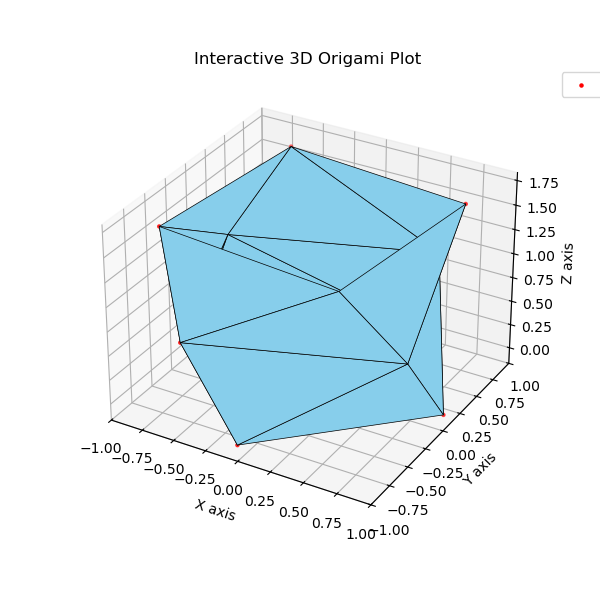

In [23]:
# Take the last displacement vector from Uhis
Ux = U_his[:, -1]  # shape (3*Nn,)

# Copy original node coordinates
Nodew = truss['Node'].copy()

# Apply displacements
Nodew[:, 0] += Ux[0::3]
Nodew[:, 1] += Ux[1::3]
Nodew[:, 2] += Ux[2::3]

plot_ori(Nodew, Panel)

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy.sparse import coo_matrix

def PrepareData(Node, Panel, Supp, Load, BarCM, RotSpring, kpf, Abar):

    # Bend = findbend(Panel, Node);

    # Find folds and boundaries
    Fold, Bdry, Trigl = findfdbd(Panel)
    
    # Combine bars from folds and boundaries
    Bars = np.vstack((Fold[:, :2], Bdry))
    
    # Compute bar directions and lengths
    B, L = dirc3d(Node, Bars)

    if Supp.shape[0] == 0:
        rs = np.array([], dtype=int)
    else:
        # Generate the first column (flattened index mapping)
        idx = np.vstack((Supp[:, 0]*3-2 , Supp[:, 0]*3-1 , Supp[:, 0]*3)).T.flatten()
        val = Supp[:, 1:4].T.flatten()

        rs = np.vstack((idx, val)).T

        # Remove rows where the second column is zero
        rs = rs[rs[:, 1] != 0]
        rs = rs[:, 0]  # Only keep the index values
        rs += 2 

    # Expand Abar if it's a scalar
    if np.isscalar(Abar):
        Abar = Abar * np.ones((Bars.shape[0], 1))
    
    # Compute initial fold angles
    pf0 = np.zeros((Fold.shape[0],))
    for i in range(Fold.shape[0]):
        pf0[i] = FoldKe_prepareData(Node, Fold[i,:])
    
    m = Node.shape[0]
    F = np.zeros((3 * m,))
    indp = Load[:, 0].astype(int)
    F[3 * indp] = Load[:, 1]
    F[3 * indp+1] = Load[:, 2]
    F[3 * indp+2] = Load[:, 3]

    # Build result structures
    truss = {
        "CM": BarCM,
        "Node": Node,
        "Bars": Bars,
        "Trigl": Trigl,
        "B": B,
        "L": L,
        "FixedDofs": np.unique(rs),
        "A": Abar
    }

    angles = {
        "CM": RotSpring,
        "fold": Fold,
        "kpf": kpf * np.ones((1, Fold.shape[0])),
        "pf0": pf0.reshape(1, -1),
        "Panel": Panel
    }

    return truss, angles, F


def GetData(Ui, Node, truss):

    Nb = truss['Bars'].shape[0]


    Exbar = np.zeros(Nb)


    # Reconstruct deformed nodal positions
    Nodenw = Node.copy()
    Nodenw[:, 0] += Ui[0::3]
    Nodenw[:, 1] += Ui[1::3]
    Nodenw[:, 2] += Ui[2::3]

    for bel in range(Nb):
        node1, node2 = truss['Bars'][bel]
        eDof = np.array([
        node1 * 3, node1 * 3 + 1, node1 * 3 + 2,
        node2 * 3, node2 * 3 + 1, node2 * 3 + 2
        ])

        u_local = Ui[eDof]
        # B_local = truss['B'].getrow(bel).toarray()[0][eDof]  # row of B for bar `bel` restricted to eDof
        row_slice = truss["B"].tocsr()[bel, :]  ; 
        sub_row = row_slice[:, eDof] ; 
        B_local = sub_row.tocoo() ; 
        L_local = truss['L'][bel]

        Exbar[bel] = BarKe_SingleOut(u_local, B_local, L_local)

    return Exbar 


def PathAnalysis( truss , F , b_lambda , MaxIcr ):

    tol = 1e-6
    MaxIter = 50

    Node = truss['Node']
    num_nodes = Node.shape[0]
    num_dofs = 3 * num_nodes

    AllDofs = np.arange(0, num_dofs)  

    U = truss['U0']

    Data = {}
    Uhis = np.zeros((num_dofs, MaxIcr + 1))
    Data['Exbar'] = np.zeros((truss['Bars'].shape[0], MaxIcr + 1))
 
    load_his = np.zeros((MaxIcr + 1,))

    FreeDofs = np.setdiff1d(AllDofs, truss['FixedDofs'])

    lmd = 0
    icrm = 0
    MUL = np.column_stack((U, U))  # Equivalent to [U, U] in MATLAB


    while icrm < MaxIcr:
        icrm += 1
        iter = 0
        err = 1.0
        print(f"icrm = {icrm}, lambda = {lmd:.4f}")

        while err > tol and iter < MaxIter:
            iter += 1

            # Assemble internal force and stiffness matrix
            IF, K = GlobalK_edu_ver( U , Node , truss )  # you must provide this function

            R = lmd * F - IF
            MRS = np.column_stack((F, R))

            # Solve for predictor and corrector direction vectors
            # Kff = K[np.ix_(FreeDofs , FreeDofs )]
            Kff_dense = K[np.ix_(FreeDofs, FreeDofs)].toarray()
            MRSf = MRS[FreeDofs, :]  # assuming MRS is densex
            # MUL[FreeDofs, :] = np.linalg.solve(Kff, MRSf)
            MUL[FreeDofs, :] = np.linalg.solve(Kff_dense, MRSf)

            dUp = MUL[:, 0]
            dUr = MUL[:, 1]

            if iter == 1:
                dUr = np.zeros_like(dUr)

            # Compute incremental load factor
            dlmd = nlsmgd(icrm, iter, dUp, dUr, b_lambda)
            dUt = dlmd * dUp + dUr
            U = U + dUt
            err = np.linalg.norm(dUt[FreeDofs])  
            lmd = lmd + dlmd
            print(f'    iter = {iter}, err = {err:.3e}, dlambda = {dlmd:.3e}')
            if err > 1e8:
                print('Divergence!')
                break

        if iter > 15:
            b_lambda = b_lambda / 2
            print('Reduce constraint radius!')
            icrm = icrm - 1
            U = Uhis[:, max(icrm, 0)]  # Python uses 0-based indexing
            lmd = load_his[max(icrm, 0)]

        elif iter < 3:
            print('Increase constraint radius!')
            b_lambda = b_lambda * 1.5
            Uhis[:, icrm] = U
            load_his[icrm] = lmd

            Exbari = GetData(U, Node, truss )
            Data['Exbar'][:, icrm] = Exbari

        else:
            Uhis[:, icrm] = U
            load_his[icrm] = lmd

            Exbari = GetData(U, Node, truss )
            Data['Exbar'][:, icrm] = Exbari
        
    # Trim arrays
    icrm += 1 ; 
    Uhis = Uhis[:, :icrm] ; 
    load_his = load_his[:icrm] ; 
    Data['Exbar'] = Data['Exbar'][:, :icrm] ;   
     
    return Uhis , load_his , Data 

# Globals
dupp1 = None
sinal = 1
dupc1 = None
numgsp = None

def nlsmgd(step, ite, dup, dur, cmp):

    global dupp1, sinal, dupc1, numgsp

    if step == 1 and ite == 1:
        sinal = 1
        dupp1 = dup.copy()

    if ite == 1:
        sinal *= np.sign(np.dot(dupp1, dup))
        dupp1 = dup.copy()

    if ite == 1:
        if step == 1:
            dl = cmp
            numgsp = np.dot(dup, dup)
            dupc1 = dup.copy()
        else:
            gsp = numgsp / np.dot(dup, dup)
            dl = sinal * cmp * np.sqrt(gsp)
            dupc1 = dup.copy()
    else:
        dl = -np.dot(dupc1, dur) / np.dot(dupc1, dup)

    return dl

import numpy as np
from scipy.sparse import coo_matrix

def GlobalK_edu_ver(Ui, Node, truss):

    Nn = Node.shape[0]
    IFb = np.zeros(3 * Nn)

    num_bars = truss["Bars"].shape[0]
    indi = np.zeros(36 * num_bars, dtype=int)
    indj = np.zeros(36 * num_bars, dtype=int)
    kentry = np.zeros(36 * num_bars, dtype=float)

    # New deformed node positions
    Nodenw = np.zeros_like(Node)
    Nodenw[:, 0] = Node[:, 0] + Ui[0::3]
    Nodenw[:, 1] = Node[:, 1] + Ui[1::3]
    Nodenw[:, 2] = Node[:, 2] + Ui[2::3]


    for bel in range(num_bars):
        n1 = truss["Bars"][bel, 0]
        n2 = truss["Bars"][bel, 1]
        eDof = np.array([3*n1, 3*n1+1, 3*n1+2, 3*n2, 3*n2+1, 3*n2+2])

        u = Ui[eDof] ; 
        row_slice = truss["B"].tocsr()[bel, :]  ; 
        sub_row = row_slice[:, eDof] ; 
        B = sub_row.tocoo() ; 
        L = truss["L"][bel] ; 
        CM = truss["CM"] ; 
        A = truss["A"][bel] ; 

        _ , Rbe , Kbe = BarKe(u, B, L, CM, A)

        IFb[eDof] += Rbe[0]

        I = np.tile(eDof[:, np.newaxis], (1, 6))
        J = I.T
        offset = 36 * bel
        o = np.arange(offset,offset+36, 1)
        indi[o] = J.flatten()
        indj[o] = I.flatten()
        kentry[o] = Kbe.flatten()

    Kb = coo_matrix((kentry, (indi, indj)), shape=(3*Nn, 3*Nn)).tocsc()

    IF = IFb
    K = Kb
    K = (K + K.T) * 0.5  

    return IF, K 


def icross(a, b):
    c = np.array([
        a[1] * b[2] - a[2] * b[1],
        a[2] * b[0] - a[0] * b[2],
        a[0] * b[1] - a[1] * b[0]
    ])
    return c

def findbend(panel, node):
    bend = []
    for p in panel:
        if len(p) == 4:
            L1 = np.linalg.norm(node[p[0] - 1] - node[p[2] - 1])
            L2 = np.linalg.norm(node[p[3] - 1] - node[p[1] - 1])
            if L1 > L2:
                lclbend = [p[1], p[3], p[0], p[2]]
            else:
                lclbend = [p[0], p[2], p[1], p[3]]
            bend.append(lclbend)
    return np.array(bend)

def findfdbd(Panel):
    Nn = max(max(p) for p in Panel)
    panelsize = [len(p) for p in Panel]

    Ptri = [Panel[i] for i in range(len(Panel)) if panelsize[i] == 3]

    Triglraw = np.vstack([
        np.array(Ptri)
    ])

    Trigl = np.unique(np.sort(Triglraw, axis=1), axis=0)

    # Assume Trigl is already defined as a (n_triangles, 3) ndarray
    Nn = np.max(Trigl) + 1  # number of nodes

    # --- Build Comm matrix (shape: Nn x n_triangles) ---
    row_idx = []
    col_idx = []
    data = []

    for i in range(Trigl.shape[0]):
        for node in Trigl[i]:
            row_idx.append(node)
            col_idx.append(i)
            data.append(1)

    Comm = coo_matrix((data, (row_idx, col_idx)), shape=(Nn, Trigl.shape[0]), dtype=int)

    # --- Compute Ge = Comm.T @ Comm ---
    Ge = (Comm.transpose().dot(Comm)).tocoo()

    # --- Find pairs of triangles that share 2 nodes ---
    Ge_dense = Ge.toarray()
    mf, me = np.where(np.triu(Ge_dense == 2))  # upper triangular part only

    # --- Build fold array ---
    fold = np.zeros((len(mf), 4), dtype=int)

    for i in range(len(mf)):
        t1 = Trigl[mf[i]]
        t2 = Trigl[me[i]]
        
        # Find shared nodes and their indices
        link, ia, ib = np.intersect1d(t1, t2, return_indices=True)
        
        oftpa = [j for j in range(3) if j not in ia]
        oftpb = [j for j in range(3) if j not in ib]

        fold[i, :] = np.concatenate([link, [t1[oftpa[0]], t2[oftpb[0]]]])

    Fold = fold[np.argsort(fold[:, 0])]

    Edge = np.sort(
        np.vstack([
            Trigl[:, [0, 1]],
            Trigl[:, [1, 2]],
            Trigl[:, [2, 0]]
        ]), axis=1
    )

    u, inv, count = np.unique(Edge, axis=0, return_inverse=True, return_counts=True)
    bdry = u[count == 1]

    return Fold, bdry, Trigl

def get_di_sim(N,h,lyr,phi):

    if np.isscalar(phi):
        rotangle = np.arange(lyr) * phi
    else:
        rotangle = np.array(phi)

    # Compute angular positions for each layer
    rdl = np.zeros((lyr, N))
    for i in range(lyr):
        rdl[i, :] = np.linspace(rotangle[i], 2 * np.pi / N * (N - 1) + rotangle[i], N)

    # Flatten node coordinates correctly for any lyr
    Xcood = np.cos(rdl).reshape(-1)
    Ycood = np.sin(rdl).reshape(-1)
    Zcood = np.repeat(np.arange(lyr), N) * h

    Node = np.column_stack((Xcood, Ycood, Zcood))

    # Build triangular panels
    Panel = []
    for i in range(lyr - 1):
        offset = i * N
        for j in range(N):
            a = offset + j
            b = offset + j + N
            c1 = offset + (j + 1) % N + N
            c2 = offset + (j + 1) % N

            Panel.append([a, b, c1])
            Panel.append([a, c2, c1])

    return Node, Panel

def plot_ori(Node, Panel, color='skyblue', alpha=1.0):
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Plot nodes
    ax.scatter(Node[:, 0], Node[:, 1], Node[:, 2], c='red', s=5, label='Nodes')

    # Plot panels
    faces = [Node[np.array(p)] for p in Panel]  # Already zero-based indexing
    poly = Poly3DCollection(faces, facecolors=color, edgecolors='k', linewidths=0.5)
    poly.set_alpha(alpha)
    ax.add_collection3d(poly)

    # Axes labels and title
    ax.set_xlabel("X axis")
    ax.set_ylabel("Y axis")
    ax.set_zlabel("Z axis")
    ax.set_title("Interactive 3D Origami Plot")
    ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0), borderaxespad=0.)

    # Equal aspect ratio
    max_range = (Node.max(axis=0) - Node.min(axis=0)).max()
    mid = (Node.max(axis=0) + Node.min(axis=0)) / 2
    ax.set_xlim(mid[0] - max_range/2, mid[0] + max_range/2)
    ax.set_ylim(mid[1] - max_range/2, mid[1] + max_range/2)
    ax.set_zlim(mid[2] - max_range/2, mid[2] + max_range/2)

    # Optional: turn axis on or off
    # ax.axis('off')

    plt.show()



    
def FoldKe_prepareData(Coord, List):


    rkj = np.transpose( Coord[List[1]] - Coord[List[0]] )
    rij = np.transpose( Coord[List[2]] - Coord[List[0]] )
    rkl = np.transpose( Coord[List[1]] - Coord[List[3]] )

    rmj = icross(rij,rkj); rnk = icross(rkj,rkl);

    dot_rnk_rij = np.dot(rnk, rij)
    sgn = np.sign(dot_rnk_rij) if abs(dot_rnk_rij) > 1e-8 else 1

    cos_theta = np.dot(rmj, rnk) / (np.linalg.norm(rmj) * np.linalg.norm(rnk))
    # Clamp to avoid domain error in case of numerical imprecision
    cos_theta = np.clip(cos_theta, -1.0, 1.0)
    he = float(sgn) * np.arccos(cos_theta)

    if he < 0:
        he = 2 * np.pi + he ;
    
    return he 

# Define bar material constitutive
def BarMater(Ex):
    return Ogden_2(Ex, 5000.0)

# Define rotational spring constitutive
def RotSpring(he, h0, kpi, L0, limlft, limrht):
    return EnhancedLinear(he, h0, kpi, L0, limlft, limrht)

def Ogden_2(Ex, C0):
    alpha = [5, 1]
    pstr = np.real(np.sqrt(2 * Ex + 1))

    # C0 scaling is kept as-is (effectively no change)
    Et = C0 / (alpha[0] - alpha[1]) * ((alpha[0] - 2) * pstr**(alpha[0] - 4) - (alpha[1] - 2) * pstr**(alpha[1] - 4))
    Sx = C0 / (alpha[0] - alpha[1]) * (pstr**(alpha[0] - 2) - pstr**(alpha[1] - 2))

    # Optional third output
    # Wb = C0 / (alpha[0] - alpha[1]) * ((pstr**alpha[0] - 1) / alpha[0] - (pstr**alpha[1] - 1) / alpha[1])
    
    return Sx, Et

def EnhancedLinear(he, h0, kpi, L0, limlft, limrht):
    he = np.asarray(he)
    h0 = np.asarray(h0)
    kpi = np.asarray(kpi)
    L0 = np.asarray(L0)

    limlft = limlft / 180 * np.pi
    partl = np.pi / limlft
    limrht = limrht / 180 * np.pi
    partr = np.pi / (2 * np.pi - limrht)

    if kpi.ndim == 0:
        kpi = kpi * np.ones_like(he)

    Rspr = np.zeros_like(he)
    Kspr = np.zeros_like(he)

    Lind = he < limlft
    Rind = he > limrht
    Mind = ~(Lind | Rind)

    Rspr[Lind] = (
        kpi[Lind] * np.real(limlft - h0[Lind])
        + kpi[Lind] * np.tan(partl / 2 * (he[Lind] - limlft)) / (partl / 2)
    )
    Kspr[Lind] = kpi[Lind] * (1 / np.cos(partl / 2 * (he[Lind] - limlft)))**2

    Rspr[Rind] = (
        kpi[Rind] * np.real(limrht - h0[Rind])
        + kpi[Rind] * np.tan(partr / 2 * (he[Rind] - limrht)) / (partr / 2)
    )
    Kspr[Rind] = kpi[Rind] * (1 / np.cos(partr / 2 * (he[Rind] - limrht)))**2

    Rspr[Mind] = kpi[Mind] * np.real(he[Mind] - h0[Mind])
    Kspr[Mind] = kpi[Mind]

    Rspr *= L0
    Kspr *= L0

    Espr = np.zeros_like(he)
    Espr[Lind] = (
        0.5 * kpi[Lind] * (np.real(h0[Lind] - limlft))**2
        + kpi[Lind] * (np.real(h0[Lind] - limlft)) * (limlft - he[Lind])
        - 4 * kpi[Lind] / partl**2 * np.log(np.abs(np.cos(partl / 2 * (limlft - he[Lind]))))
    )

    Espr[Rind] = (
        0.5 * kpi[Rind] * (np.real(limrht - h0[Rind]))**2
        + kpi[Rind] * (np.real(limrht - h0[Rind])) * (he[Rind] - limrht)
        - 4 * kpi[Rind] / partr**2 * np.log(np.abs(np.cos(partr / 2 * (he[Rind] - limrht))))
    )

    Espr[Mind] = 0.5 * kpi[Mind] * (np.real(he[Mind] - h0[Mind]))**2
    Espr *= L0

    return Rspr, Kspr, Espr

def dirc3d(Node, Ele):

    Ne = Ele.shape[0]
    Nn = Node.shape[0]

    # Compute direction vectors and normalize
    D = Node[Ele[:, 1], :] - Node[Ele[:, 0], :]
    L = np.linalg.norm(D, axis=1)
    D_unit = D / L[:, np.newaxis]

    # # Row indices: repeat element indices 6 times each
    # row = np.repeat(np.arange(Ne), 6)

    # # Column indices: 3 DOFs per node
    # col = np.hstack([
    # 3 * Ele[:, 0] + 0,  # x of node 1
    # 3 * Ele[:, 0] + 1,  # y of node 1
    # 3 * Ele[:, 0] + 2,  # z of node 1
    # 3 * Ele[:, 1] + 0,  # x of node 2
    # 3 * Ele[:, 1] + 1,  # y of node 2
    # 3 * Ele[:, 1] + 2   # z of node 2
    # ])

    # # Values: concatenate D and -D
    # data = np.hstack([D_unit, -D_unit]).flatten()

    # # Build sparse matrix B
    # B = coo_matrix((data, (row, col)), shape=(Ne, 3 * Nn))
    # print(B)

    # For each element, build the 6 triplets (3 DOFs per 2 nodes)
    row = []
    col = []
    data = []

    for i in range(Ne):
        n1, n2 = Ele[i]
        d = D_unit[i]

        # Node 1 contributions (positive)
        row.extend([i] * 3)
        col.extend([3 * n1 + j for j in range(3)])
        data.extend(d)

        # Node 2 contributions (negative)
        row.extend([i] * 3)
        col.extend([3 * n2 + j for j in range(3)])
        data.extend(-d)

    # Convert to numpy arrays
    row = np.array(row)
    col = np.array(col)
    data = np.array(data)

    # Build sparse matrix without sorting
    B = coo_matrix((data, (row, col)), shape=(Ne, 3 * Nn))
    B = -B
    
    return B, L

from filecmp import cmp
import numpy as np

def BarKe(u, B, L, CM, A):

    du = u[:3] - u[3:] ;
    Du = np.concatenate((du, -du)) ;
    Bu = B @ u if B.ndim == 2 else np.dot(B, u)
    Ex = Bu / L + 0.5 * (du @ du) / (L ** 2)
    [Sx, Et] = CM(Ex)
    Fx = Sx * A

    Du_L = (Du / L).reshape(1, -1)
    B_plus = B.toarray() + Du_L
    Rbe = Fx[0] * B_plus

    B_dense = B.toarray().ravel()

    # Outer product
    Kel_dense = np.outer(B_dense, B_dense)
    Kel_sparse = coo_matrix(Kel_dense)
    Kel = Kel_sparse

    Kg = Fx / L * np.block([[np.eye(3), -np.eye(3)],
                    [-np.eye(3), np.eye(3)]])

    K1 = (np.outer(Du, B_dense) + np.outer(B_dense, Du)) / L
    K2 = np.outer(Du, Du) / (L ** 2)

    scalar = (Et[0] * A[0]) / L
    Kbe = scalar * (Kel.toarray() + K1 + K2) + Kg

    return Ex, Rbe, Kbe

# BarKe(u, B, L, CM, A)

def BarKe_SingleOut(u, B, L):

    du = u[:3] - u[3:] ;
    Bu = B @ u if B.ndim == 2 else np.dot(B, u)
    Ex = Bu / L + 0.5 * (du @ du) / (L ** 2)

    return Ex
